# Plot a confusion matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import datetime as dt

Data is captured after a training run and imported from a CSV. This prevents loss of model training data when the runtime terminates or the kernel crashes. Neither TensorFlow or Keras appear to provide access to model history from a loaded model.

In [91]:
# Function to plot confusion matrix. This prevents the notebook from printing the plot twice.
def plot_confusion(t_class, p_class, color_map, title, title_size, label_size, tick_size):
    fig, ax = plt.subplots(figsize=(7,7))

    plt.title(title, fontsize = title_size)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.ylabel("True label", fontsize = label_size)
    plt.xlabel("Predicted label", fontsize = label_size)

    cm = ConfusionMatrixDisplay.from_predictions(t_class, 
                                                 p_class, 
                                                 cmap=color_map)

    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position()
                        .y0,0.02,ax.get_position().height])

    cm.plot(ax=ax, colorbar=False, 
            xticks_rotation='vertical', 
            cmap=color_map)
    
    plt.colorbar(cm.im_, cax=cax)
   
    plt.close()

    return fig

In [92]:
def get_data(file_path):
    # Import CSV of all predictions from a training run
    df = pd.read_csv(file_path)

    # Rename columns: 
    df = df.rename(columns={"true_class": "True labels", 
                            "predicted_class": "Predicted labels",
                            "predicted_value": "Predicted value"
                            })

    # Filter data by top predictions
    top_predictions = df.iloc[::12, :].reset_index(drop=True)

    return top_predictions

In [2]:
# Sample data
pred1 = ['Watching TV', [['Watching TV', 0.9], ['Sitting in Wheelchair', 0.1], 
                         ['EVS Visit', 0.06], ['Asleep Trying to sleep', 0.8], 
                         ['Doctor Visit', 0.0], ['Therapy', 0.01], 
                         ['Eating', 0.02], ['Nurse Visit', 0.5], 
                         ['Talking on the Phone', 0.4],['Lying In Bed', 0.04], 
                         ['Brought Back From Therapy (Transfer To Bed)', 0.5],
                         ['Family', 0.05]]
                         ]

pred2 = ['Doctor Visit', [['Doctor Visit', 0.9], ['Watching TV', 0.1], 
                          ['Sitting in Wheelchair', 0.0],['EVS Visit', 0.06],
                          ['Asleep Trying to sleep', 0.8], ['Therapy', 0.01],
                          ['Eating', 0.02], ['Nurse Visit', 0.5], 
                          ['Talking on the Phone', 0.4],['Lying In Bed', 0.04], 
                          ['Brought Back From Therapy (Transfer To Bed)', 0.5],
                          ['Family', 0.0]]
                          ]

# Plot all predictions

In [93]:
all_predictions = get_data('../data/2024-09-19-train-all.csv')
all_predictions

,True labels,Predicted labels,Probabilities
0,Transfer To Bed,Transfer To Bed,1.00
1,Transfer To Bed,Transfer To Bed,1.00
2,Transfer To Bed,Transfer To Bed,0.99
3,Transfer To Bed,Transfer To Bed,1.00
4,Doctor Visit,Doctor Visit,0.99
...,...,...,...
890,Talking on the Phone,Talking on the Phone,1.00
891,Talking on the Phone,Talking on the Phone,1.00
892,Talking on the Phone,Talking on the Phone,1.00
893,Talking on the Phone,Talking on the Phone,1.00


In [94]:
# Select true and predicted labels
true_classes = all_predictions['True labels']
predicted_classes = all_predictions['Predicted labels']

In [95]:
# Make classification report
report = classification_report(true_classes, predicted_classes)
print(report)

                        precision    recall  f1-score   support

Asleep Trying to sleep       0.98      0.76      0.86       316
          Doctor Visit       1.00      1.00      1.00         2
             EVS Visit       0.24      1.00      0.39        10
                Eating       0.93      0.96      0.95        72
                Family       0.86      1.00      0.93        19
          Lying In Bed       0.69      1.00      0.82        66
           Nurse Visit       0.83      0.66      0.73        96
 Sitting In Wheelchair       0.58      1.00      0.73        56
  Talking on the Phone       0.71      0.97      0.82        36
               Therapy       0.28      1.00      0.43         5
       Transfer To Bed       0.80      1.00      0.89         4
           Watching TV       0.95      0.77      0.85       213

              accuracy                           0.82       895
             macro avg       0.74      0.93      0.78       895
          weighted avg       0.88     

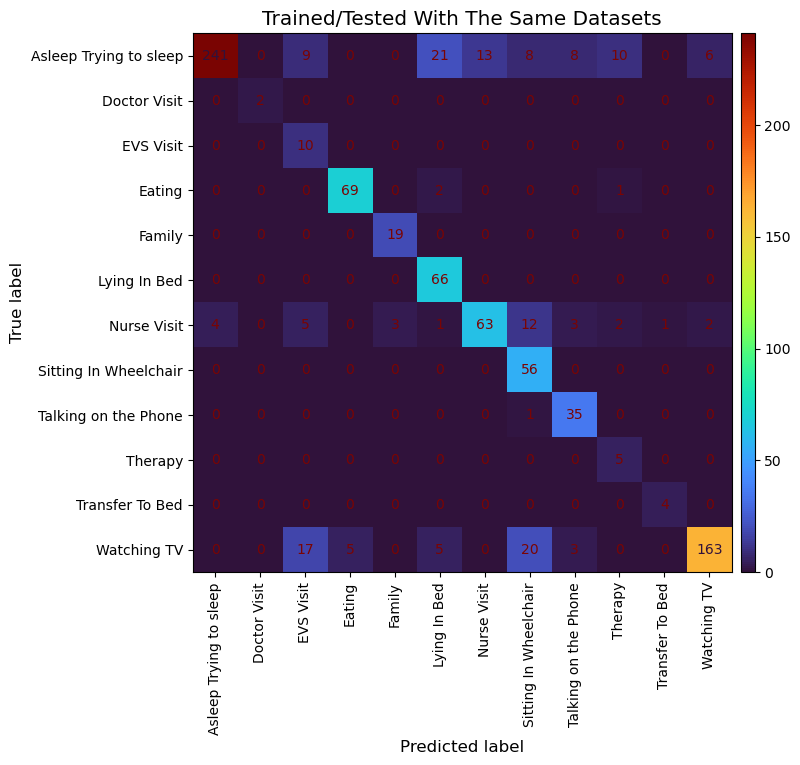

In [96]:
# Define plot design
colors = 'turbo'
title = 'Trained/Tested With The Same Datasets' 
title_size = 'x-large'
tick_size = 'medium'
label_size = 'large'

# Make the plot
confusion_matrix = plot_confusion(true_classes, 
                                  predicted_classes, 
                                  color_map = colors,
                                  title = title,
                                  title_size = title_size,
                                  tick_size = tick_size,
                                  label_size = label_size)

# Plot training predictions

In [97]:
train_predictions = get_data('../data/2024-09-21-19-29-39-train.csv')
train_predictions

,True labels,Predicted labels,Predicted value
0,EVS Visit,EVS Visit,0.93
1,EVS Visit,EVS Visit,0.92
2,EVS Visit,EVS Visit,0.93
3,EVS Visit,EVS Visit,0.81
4,EVS Visit,EVS Visit,0.99
...,...,...,...
443,Nurse Visit,Nurse Visit,0.99
444,Nurse Visit,Nurse Visit,0.96
445,Nurse Visit,Nurse Visit,1.00
446,Transfer To Bed,Transfer To Bed,1.00


In [98]:
# Select true and predicted labels
true_classes = train_predictions['True labels']
predicted_classes = train_predictions['Predicted labels']

In [99]:
# Make classification report
report = classification_report(true_classes, predicted_classes)
print(report)

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.98      0.32      0.48       158
          Doctor Visit       0.00      0.00      0.00         1
             EVS Visit       1.00      1.00      1.00         5
                Eating       1.00      1.00      1.00        36
                Family       1.00      1.00      1.00        10
          Lying In Bed       0.94      0.88      0.91        33
           Nurse Visit       0.96      0.90      0.92        48
 Sitting In Wheelchair       1.00      0.46      0.63        28
  Talking on the Phone       0.90      1.00      0.95        18
               Therapy       0.03      1.00      0.06         3
       Transfer To Bed       0.06      1.00      0.11         2
           Watching TV       0.97      0.94      0.96       106

              accuracy                           0.69       448
             macro avg       0.74      0.79      0.67       448
          weighted avg       0.96     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


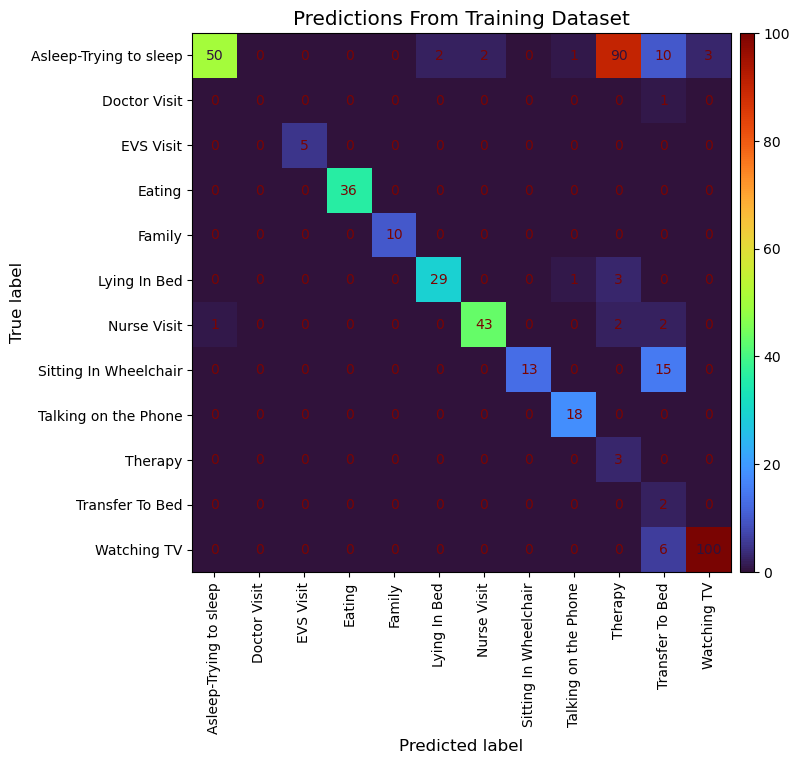

In [100]:
# Define plot design
colors = 'turbo'
title = 'Predictions From Training Dataset'
title_size = 'x-large'
tick_size = 'medium'
label_size = 'large'

# Make the plot
confusion_matrix = plot_confusion(true_classes, 
                                  predicted_classes, 
                                  color_map = colors,
                                  title = title,
                                  title_size = title_size,
                                  tick_size = tick_size,
                                  label_size = label_size)

# Plot testing predictions

In [101]:
test_predictions = get_data('../data/2024-09-21-20-07-22-test.csv')
test_predictions

,True labels,Predicted labels,Predicted value
0,EVS Visit,Sitting In Wheelchair,0.81
1,EVS Visit,Nurse Visit,0.72
2,EVS Visit,Nurse Visit,0.49
3,EVS Visit,Nurse Visit,0.71
4,EVS Visit,Nurse Visit,0.97
...,...,...,...
442,Nurse Visit,Asleep-Trying to sleep,0.86
443,Nurse Visit,Sitting In Wheelchair,0.59
444,Nurse Visit,Therapy,0.60
445,Transfer To Bed,Transfer To Bed,1.00


In [102]:
# Select true and predicted labels
true_classes = test_predictions['True labels']
predicted_classes = test_predictions['Predicted labels']

In [103]:
# Make classification report
report = classification_report(true_classes, predicted_classes)
print(report)

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.72      0.31      0.43       158
          Doctor Visit       0.00      0.00      0.00         1
             EVS Visit       0.00      0.00      0.00         5
                Eating       0.32      0.19      0.24        36
                Family       1.00      0.33      0.50         9
          Lying In Bed       0.25      0.03      0.05        33
           Nurse Visit       0.17      0.42      0.24        48
 Sitting In Wheelchair       0.29      0.29      0.29        28
  Talking on the Phone       0.12      0.17      0.14        18
               Therapy       0.03      1.00      0.06         2
       Transfer To Bed       0.02      1.00      0.04         2
           Watching TV       0.00      0.00      0.00       107

              accuracy                           0.21       447
             macro avg       0.24      0.31      0.17       447
          weighted avg       0.36     

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


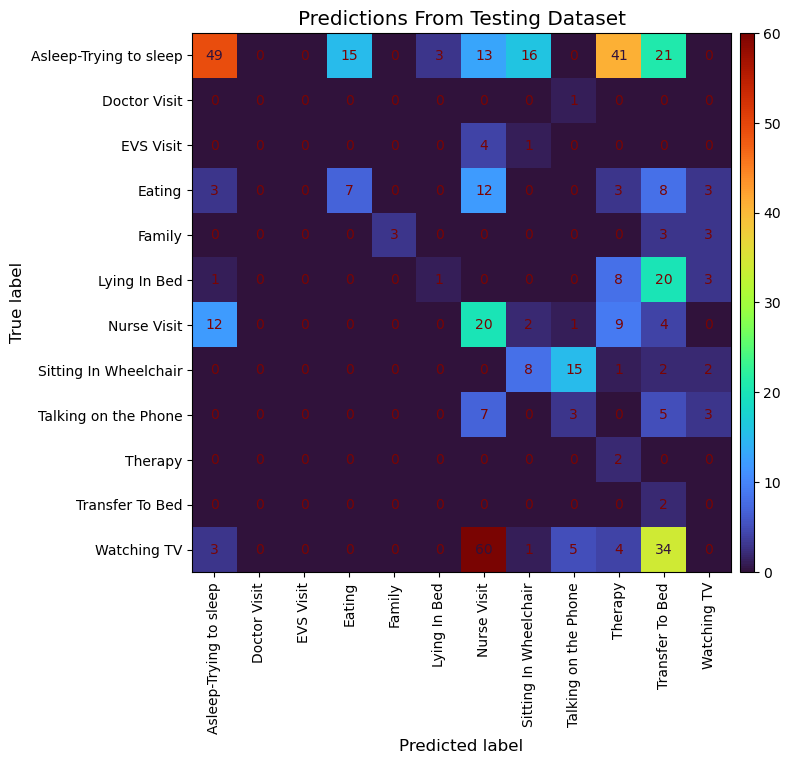

In [104]:
# Define plot design
colors = 'turbo'
title = 'Predictions From Testing Dataset'
title_size = 'x-large'
tick_size = 'medium'
label_size = 'large'

# Make the plot
confusion_matrix = plot_confusion(true_classes, 
                                  predicted_classes, 
                                  color_map = colors,
                                  title = title,
                                  title_size = title_size,
                                  tick_size = tick_size,
                                  label_size = label_size)

## References
- [Resize confustion matrix](https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn)
- [MPL colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)